In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Defence/Day1/Final_data.csv")

In [ ]:
df.head()

,Student Number,Age,Gender,Education Level,Major/Field of Study,Department Selection,CGPA,CGPA Comparison,Average Course Grade Range,Questions Understandable,...,Academic Challenges(Language Barriers),Academic Challenges(Time Management),Extracurricular Participation(Student government or leadership positions),Extracurricular Participation(Community service organizations),Extracurricular Participation(Arts clubs),Extracurricular Participation(Special interest clubs),Extracurricular Participation(Academic clubs),Extracurricular Participation(Sports teams),Extracurricular Participation(None of the above / Not involved in any extracurricular activities),Dropout
0,1,22,Male,1st Year,Computer Science and Engineering,Forcefully Given,3.00,Similar,2.76 - 3.00,No,...,No,No,No,No,No,No,No,No,Yes,Yes
1,2,23,Female,3rd Year,BFA,Personal Choice,3.58,Lower,3.51 - 3.75,Yes,...,No,Yes,No,No,Yes,No,No,No,No,No
2,3,22,Female,3rd Year,GDM,Personal Choice,3.76,Higher,3.51 - 3.75,Yes,...,Yes,No,No,No,No,Yes,No,No,No,No
3,4,23,Male,3rd Year,Computer Science and Engineering,Forcefully Given,2.98,Lower,2.76 - 3.00,No,...,No,No,No,No,No,Yes,No,No,No,Yes
4,5,22,Male,2nd Year,EEE,Personal Choice,3.39,Similar,3.26 - 3.50,Average,...,No,Yes,No,No,No,No,No,No,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 66 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Student Number                                                                                     1144 non-null   int64  
 1   Age                                                                                                1144 non-null   int64  
 2   Gender                                                                                             1144 non-null   object 
 3   Education Level                                                                                    1144 non-null   object 
 4   Major/Field of Study                                                                               1144 non-null   objec

Null value imputing

In [ ]:
df.iloc[:,0:20].isnull().sum()

Student Number                   0
Age                              0
Gender                           0
Education Level                  0
Major/Field of Study             0
Department Selection             0
CGPA                             0
CGPA Comparison                  0
Average Course Grade Range      10
Questions Understandable         0
Marking System Strictness        0
Retake Courses                   0
Weekly Study Hours               0
Preferred Study Location         0
Job Status                       0
Family Impact on Study           0
Travel Time to Campus            0
Past Failures                    0
Comfort with Online Learning     0
Academic Performance Level       0
dtype: int64

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for i in categorical_columns:
  df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
for idx, column in enumerate(df.columns):
    unique_values = df[column].unique()
    column_type = df[column].dtype
    print(f"Column Index: {idx}")
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Data Type: {column_type}\n")

Column Index: 0
Column: Student Number
Unique Values: [   1    2    3 ... 1142 1143 1144]
Data Type: int64

Column Index: 1
Column: Age
Unique Values: [22 23 20 25 24 21 27 18 19 33 26]
Data Type: int64

Column Index: 2
Column: Gender
Unique Values: ['Male' 'Female']
Data Type: object

Column Index: 3
Column: Education Level
Unique Values: ['1st Year' '3rd Year' '2nd Year' '4th Year']
Data Type: object

Column Index: 4
Column: Major/Field of Study
Unique Values: ['Computer Science and Engineering' 'BFA' 'GDM' 'EEE' 'SWE' 'BBA' 'BTX'
 'Mechatronics Engineering' 'Statistics' 'Fisheries' 'CE' 'Hons. English'
 'Agriculture' 'DVM' 'Accounting' 'ba' 'bss' 'nfe' 'mathematics' 'fahs'
 'Law' 'Pharmacy' 'Textile' 'Microbiology' 'b.a' 'bsc'
 'Genetic Engineering']
Data Type: object

Column Index: 5
Column: Department Selection
Unique Values: ['Forcefully Given' 'Personal Choice']
Data Type: object

Column Index: 6
Column: CGPA
Unique Values: [3.   3.58 3.76 2.98 3.39 3.05 3.15 3.2  3.85 3.36 3.7 

In [ ]:
X=df.drop(columns='Dropout')
Y=df['Dropout']

In [ ]:
X.shape

(1144, 65)

In [ ]:
Y.shape

(1144,)

encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [ ]:
ordinal_categories = {
    'Education Level': ['1st Year', '2nd Year', '3rd Year', '4th Year'],
    'CGPA Comparison': ['Lower', 'Similar', 'Higher'],
    'Average Course Grade Range': ['2.26 - 2.50', '2.51 - 2.75', '2.76 - 3.00', '3.00 - 3.25', '3.26 - 3.50', '3.51 - 3.75', '3.76 - 4.00'],
    'Weekly Study Hours': ['1-5', '5-10', '6-10', '11-15', '16-20', 'More then 20'],
    'Job Status': ['No', 'Part-time', 'Full-time'],
    'Travel Time to Campus': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6'],
    'Average Sleep Hours': ['2-4', '4-6', '6-8', '8-10'],
    'Regular Workout': ['No', 'Sometimes', 'Yes'],
    'Physical Health': ['Poor', 'Fair', 'Good', 'Excellent'],
    'Tuition Satisfaction': ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied'],
    'Social Media Time': ['1-2', '3-4', '5-6', '7-8']
}

# Ordinal encoding
ordinal_enc = OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_categories.keys()])
X[list(ordinal_categories.keys())] = ordinal_enc.fit_transform(X[list(ordinal_categories.keys())])


In [ ]:
X

,Student Number,Age,Gender,Education Level,Major/Field of Study,Department Selection,CGPA,CGPA Comparison,Average Course Grade Range,Questions Understandable,...,Academic Challenges(Technical Skills),Academic Challenges(Language Barriers),Academic Challenges(Time Management),Extracurricular Participation(Student government or leadership positions),Extracurricular Participation(Community service organizations),Extracurricular Participation(Arts clubs),Extracurricular Participation(Special interest clubs),Extracurricular Participation(Academic clubs),Extracurricular Participation(Sports teams),Extracurricular Participation(None of the above / Not involved in any extracurricular activities)
0,1,22,Male,0.0,Computer Science and Engineering,Forcefully Given,3.00,1.0,2.0,No,...,No,No,No,No,No,No,No,No,No,Yes
1,2,23,Female,2.0,BFA,Personal Choice,3.58,0.0,5.0,Yes,...,No,No,Yes,No,No,Yes,No,No,No,No
2,3,22,Female,2.0,GDM,Personal Choice,3.76,2.0,5.0,Yes,...,Yes,Yes,No,No,No,No,Yes,No,No,No
3,4,23,Male,2.0,Computer Science and Engineering,Forcefully Given,2.98,0.0,2.0,No,...,No,No,No,No,No,No,Yes,No,No,No
4,5,22,Male,1.0,EEE,Personal Choice,3.39,1.0,4.0,Average,...,No,No,Yes,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1140,23,Male,0.0,Computer Science and Engineering,Personal Choice,2.84,0.0,4.0,No,...,No,No,Yes,No,No,No,No,No,No,Yes
1140,1141,21,Male,2.0,Fisheries,Forcefully Given,2.81,1.0,3.0,Yes,...,Yes,Yes,No,No,No,No,No,No,No,Yes
1141,1142,22,Female,1.0,EEE,Personal Choice,2.76,1.0,2.0,Yes,...,Yes,Yes,No,No,No,No,No,No,Yes,No
1142,1143,20,Male,1.0,BBA,Personal Choice,2.87,2.0,3.0,No,...,No,Yes,No,Yes,No,No,No,No,No,No


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 65 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Student Number                                                                                     1144 non-null   int64  
 1   Age                                                                                                1144 non-null   int64  
 2   Gender                                                                                             1144 non-null   object 
 3   Education Level                                                                                    1144 non-null   float64
 4   Major/Field of Study                                                                               1144 non-null   objec

In [ ]:
Y

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
1139    Yes
1140    Yes
1141     No
1142    Yes
1143    Yes
Name: Dropout, Length: 1144, dtype: object

In [ ]:
# Label encoding for the target column
label_enc = LabelEncoder()
Y= label_enc.fit_transform(Y)

In [ ]:
# Identify object columns
object_cols = X.select_dtypes(include='object').columns
# Perform one-hot encoding on object columns and concatenate to the original DataFrame
X = pd.get_dummies(X, columns=object_cols, drop_first=True)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(915, 128)

In [ ]:
x_test.shape

(229, 128)

ML

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#SVM

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.71%


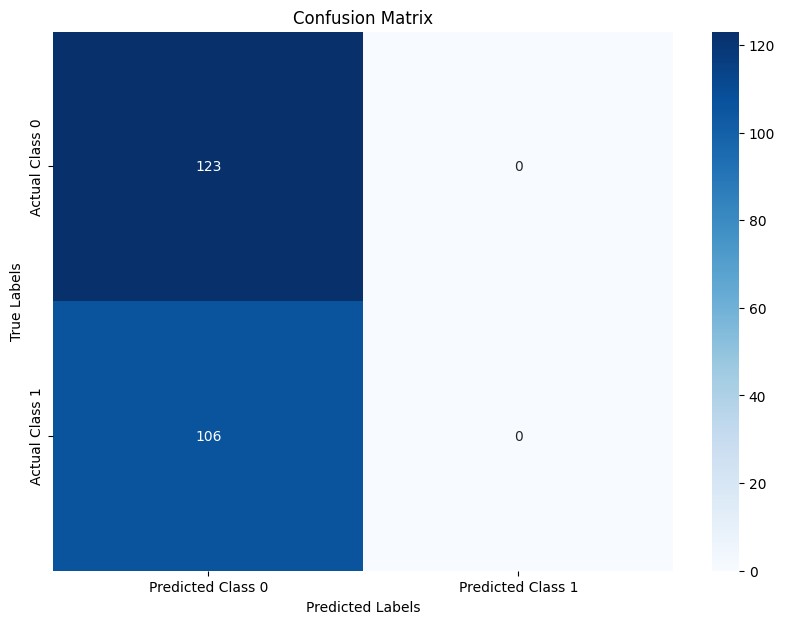

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       123
           1       0.00      0.00      0.00       106

    accuracy                           0.54       229
   macro avg       0.27      0.50      0.35       229
weighted avg       0.29      0.54      0.38       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.02%


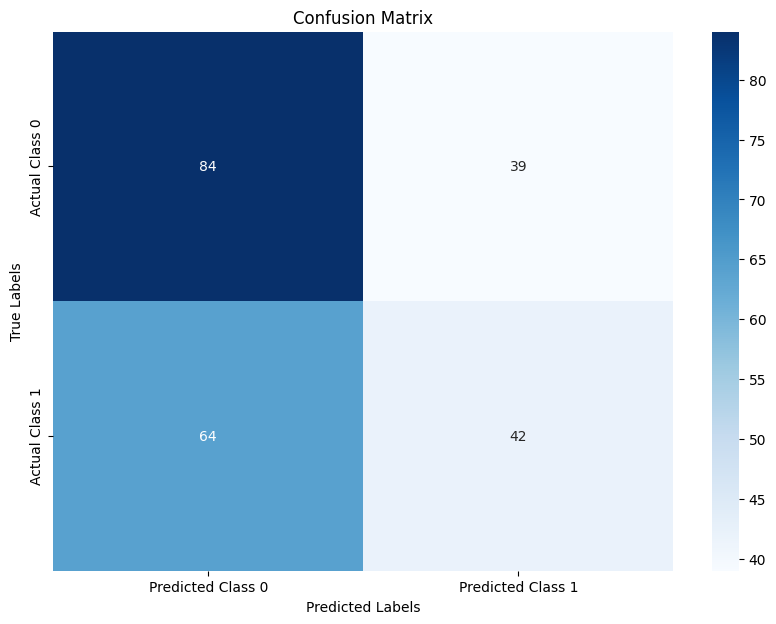

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62       123
           1       0.52      0.40      0.45       106

    accuracy                           0.55       229
   macro avg       0.54      0.54      0.53       229
weighted avg       0.54      0.55      0.54       229



In [ ]:
# Naive Bias

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 68.56%


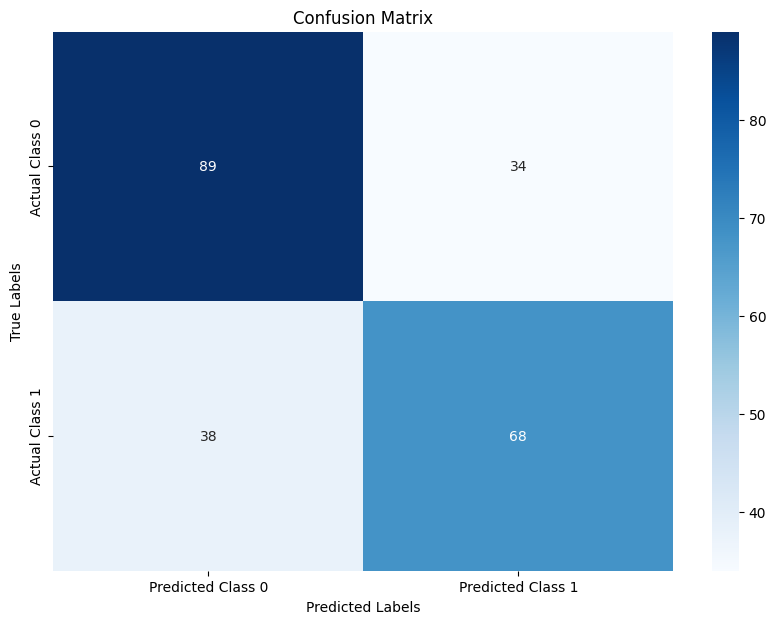

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       123
           1       0.67      0.64      0.65       106

    accuracy                           0.69       229
   macro avg       0.68      0.68      0.68       229
weighted avg       0.68      0.69      0.69       229



In [ ]:
# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.72%


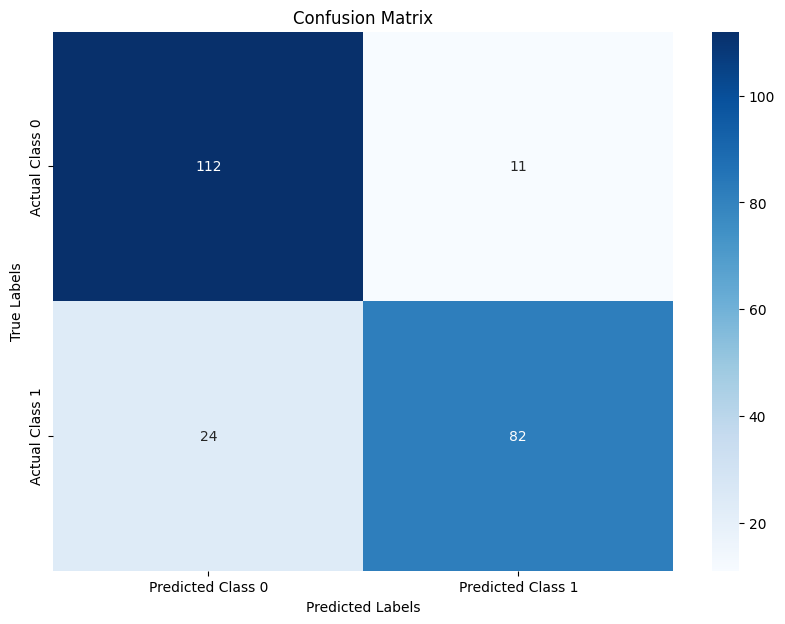

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       123
           1       0.88      0.77      0.82       106

    accuracy                           0.85       229
   macro avg       0.85      0.84      0.84       229
weighted avg       0.85      0.85      0.85       229



In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.34%


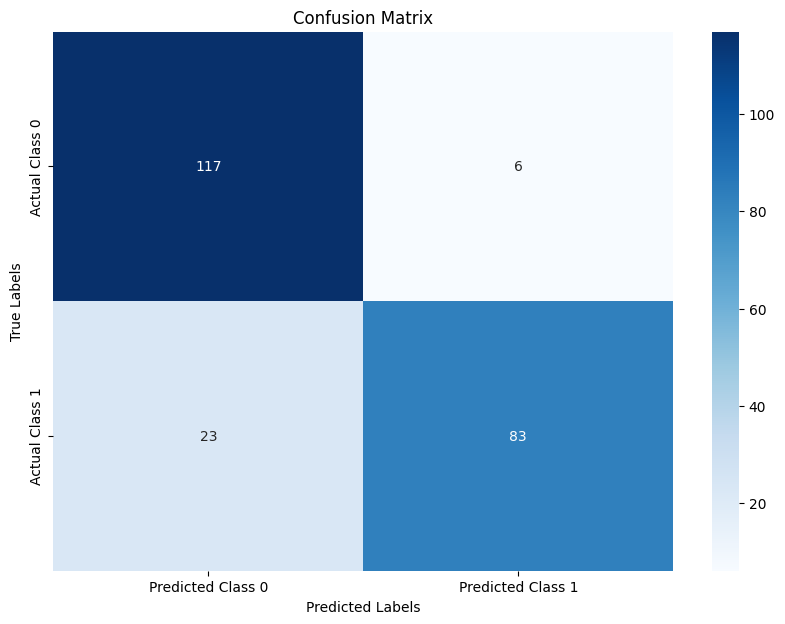

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       123
           1       0.93      0.78      0.85       106

    accuracy                           0.87       229
   macro avg       0.88      0.87      0.87       229
weighted avg       0.88      0.87      0.87       229



In [ ]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.89%


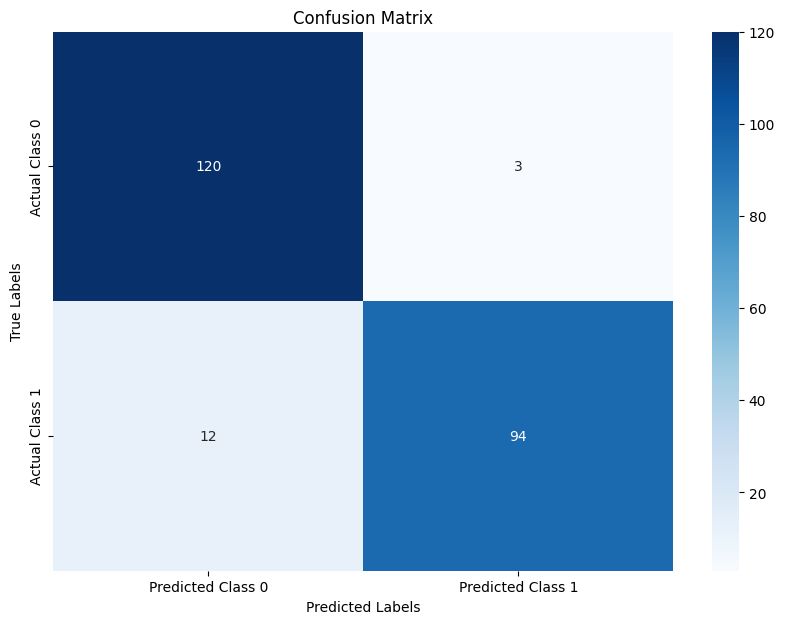

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       123
           1       0.97      0.89      0.93       106

    accuracy                           0.93       229
   macro avg       0.94      0.93      0.93       229
weighted avg       0.94      0.93      0.93       229



In [ ]:
# XGB

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.58%


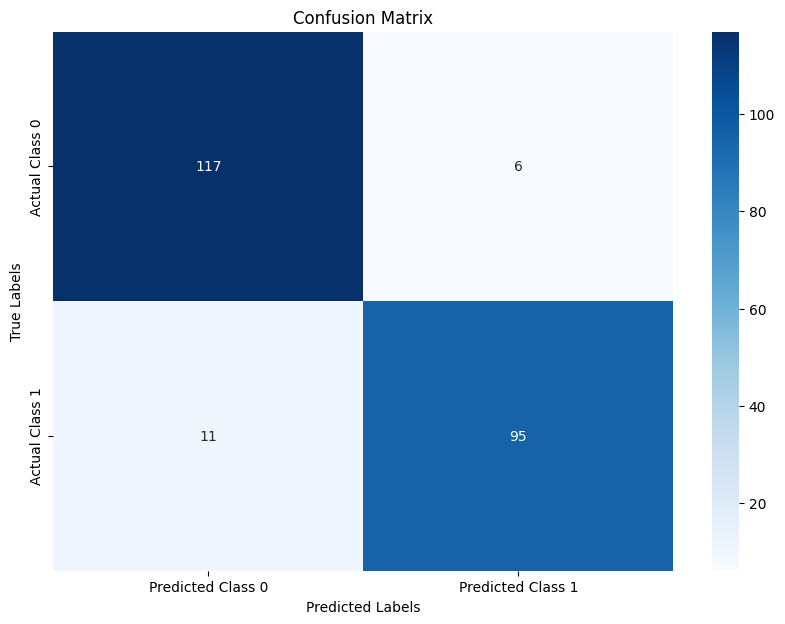

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       123
           1       0.94      0.90      0.92       106

    accuracy                           0.93       229
   macro avg       0.93      0.92      0.93       229
weighted avg       0.93      0.93      0.93       229



In [ ]:
# LGBM

from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_pred=lgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 389, number of negative: 526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425137 -> initscore=-0.301722
[LightGBM] [Info] Start training from score -0.301722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 91.27%


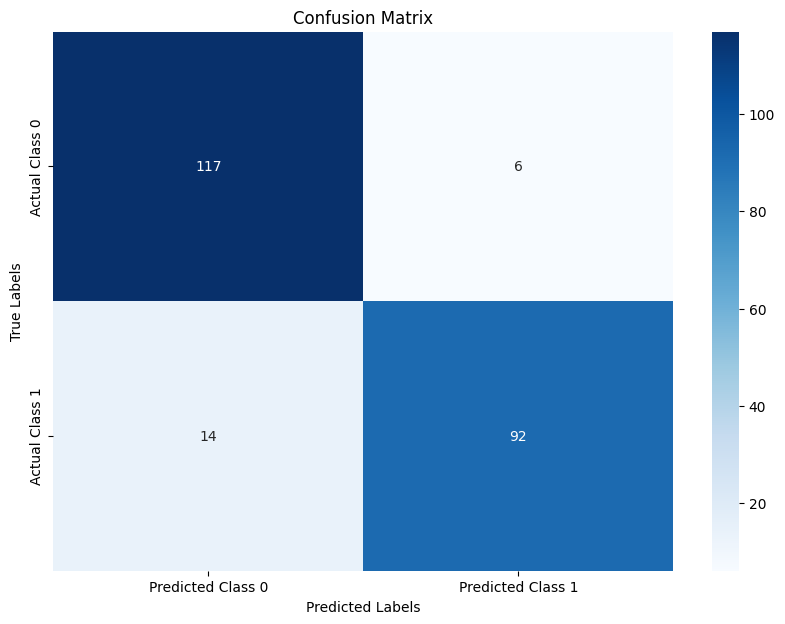

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Create the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       123
           1       0.94      0.87      0.90       106

    accuracy                           0.91       229
   macro avg       0.92      0.91      0.91       229
weighted avg       0.91      0.91      0.91       229



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 389, number of negative: 526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425137 -> initscore=-0.301722
[LightGBM] [Info] Start training from score -0.301722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


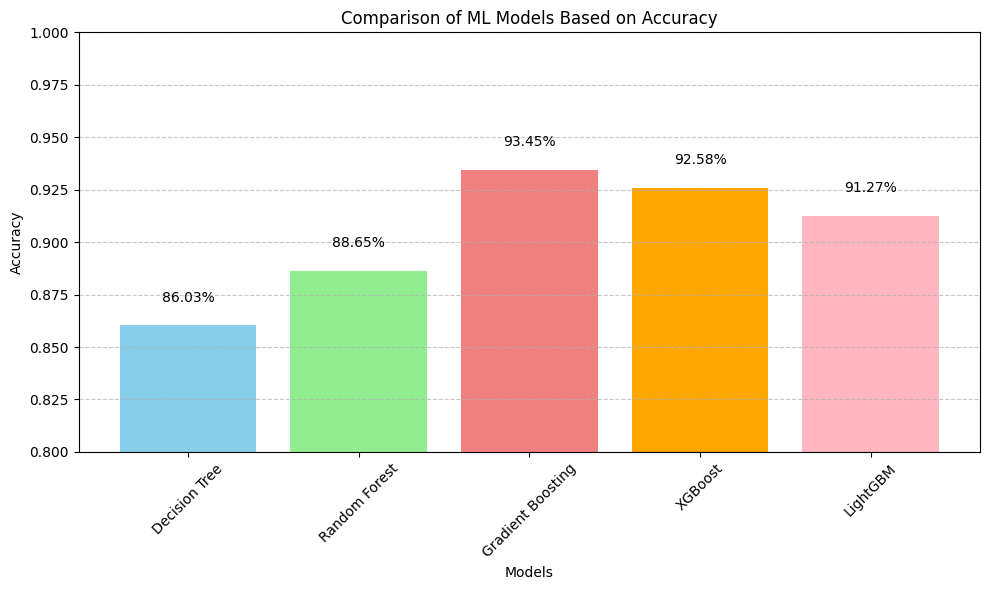

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Plot results
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink'])

# Add accuracy values above bars
for bar, acc in zip(bars, results.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models Based on Accuracy')
plt.ylim([0.8, 1.0])  # Adjust the y-axis limits if necessary
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Model save as pkl file

In [ ]:
import pickle

# Assuming `model` is your trained machine learning model
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)


Load model ( remove # of 3 and 4 line)

In [ ]:
import pickle
# Load the model from the file
# with open('model.pkl', 'rb') as file:
    # loaded_model = pickle.load(file)

# Now you can use `loaded_model` to make predictions or further training